<a href="https://colab.research.google.com/github/AniketJoshi111/STC-repo/blob/main/STC_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

In [2]:
from google.colab import files
uploaded = files.upload()


Saving StudentsPerformance_modified.csv to StudentsPerformance_modified.csv


In [4]:
data = pd.read_csv('StudentsPerformance_modified.csv')
print(data.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course math score  reading score  writing score  
0                    none         72           72.0           74.0  
1               completed         69           90.0           88.0  
2                    none         90           95.0           93.0  
3                    none         47           57.0           44.0  
4                    none         76           78.0           75.0  


In [5]:
print(data.isnull().sum())


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64


In [6]:
data = data.dropna(subset=['math score', 'reading score', 'writing score'])

data['math score'] = pd.to_numeric(data['math score'], errors='coerce')
data['reading score'] = pd.to_numeric(data['reading score'], errors='coerce')
data['writing score'] = pd.to_numeric(data['writing score'], errors='coerce')

data['average_score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1, skipna=True)


threshold = 50
# Assign 'pass' or 'fail' based on the average score
data['result'] = data['average_score'].apply(lambda x: 'pass' if x >= threshold else 'fail')

# Remove the 'average_score' column
data.drop(columns=['average_score'], inplace=True)

data.head()


<ipython-input-6-fb3f0d41eaf9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['math score'] = pd.to_numeric(data['math score'], errors='coerce')
<ipython-input-6-fb3f0d41eaf9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reading score'] = pd.to_numeric(data['reading score'], errors='coerce')
<ipython-input-6-fb3f0d41eaf9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,result
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,pass
1,female,group C,some college,standard,completed,69.0,90.0,88.0,pass
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,pass
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,fail
4,male,group C,some college,standard,none,76.0,78.0,75.0,pass


In [7]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)
categorical_cols.remove('result')
#removed grades becoz it will be used for testing



['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'result']


In [8]:
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

print(data.head())

   gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test preparation course  math score  reading score  writing score result  
0                        1        72.0           72.0           74.0   pass  
1                        0        69.0           90.0           88.0   pass  
2                        1        90.0           95.0           93.0   pass  
3                        1        47.0           57.0           44.0   fail  
4                        1        76.0           78.0           75.0   pass  


<ipython-input-8-f1188d27d2eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
<ipython-input-8-f1188d27d2eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
<ipython-input-8-f1188d27d2eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [9]:
X = data.drop('result', axis=1)
y = data['result']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
best_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='rbf',probability=True)

# Train a third model (e.g., Decision Tree)
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=10)

nb_model = GaussianNB(var_smoothing=1.0)
knn_model = KNeighborsClassifier(weights='uniform',n_neighbors=11,metric="euclidean",algorithm='auto')

#meta model
meta_model = LogisticRegression()

#meta model : Logisitic regression

enc = OneHotEncoder(handle_unknown='ignore')


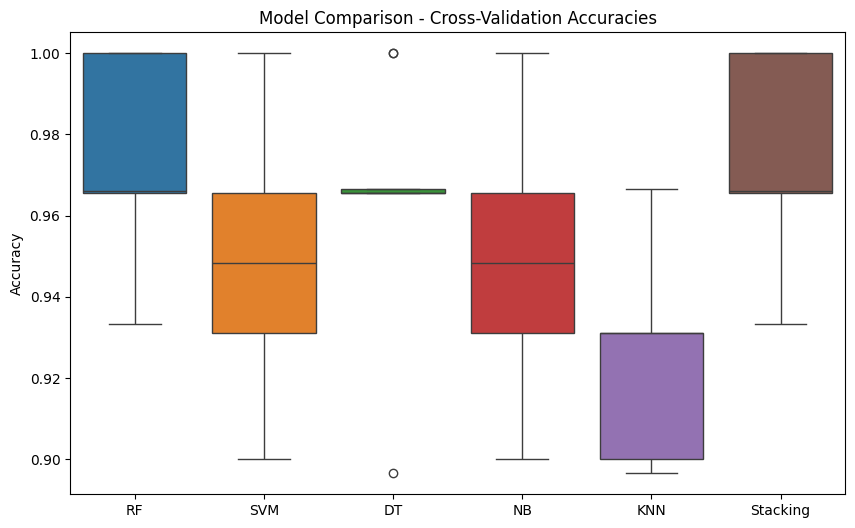

Random Forest Avg Accuracy: 0.9762068965517241
SVM Avg Accuracy: 0.9487356321839082
Decision Tree Avg Accuracy: 0.9657471264367816
Naive Bayes Avg Accuracy: 0.9487356321839082
KNN Avg Accuracy: 0.9249425287356322


Stacking accuracy: 0.9762068965517241


In [13]:
# Initialize StratifiedKFold with 10 splits
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

imputer = SimpleImputer(strategy='mean')
# Arrays to store fold accuracies
rf_accuracies = []
svm_accuracies = []
dt_accuracies = []
nb_accuracies = []
knn_accuracies = []
stack_accuracies = []

# Loop through each fold
for train_index, test_index in skf.split(X_train, y_train):
    # Split the data into training and testing sets for this fold
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    X_train_fold = imputer.fit_transform(X_train_fold)
    X_test_fold = imputer.transform(X_test_fold)

    # Train each model on the training fold
    best_rf_model.fit(X_train_fold, y_train_fold)
    svm_model.fit(X_train_fold, y_train_fold)
    dt_model.fit(X_train_fold, y_train_fold)
    nb_model.fit(X_train_fold, y_train_fold)
    knn_model.fit(X_train_fold, y_train_fold)


    # Make predictions on the test fold
    rf_pred = best_rf_model.predict(X_test_fold)
    svm_pred = svm_model.predict(X_test_fold)
    dt_pred = dt_model.predict(X_test_fold)
    nb_pred = nb_model.predict(X_test_fold)
    knn_pred = knn_model.predict(X_test_fold)

    stacked_features = np.column_stack((rf_pred, svm_pred, dt_pred, nb_pred, knn_pred))
    stacked_features_encoded = enc.fit_transform(stacked_features).toarray()

    # Make predictions on the training fold for the meta-model
    rf_pred_train = best_rf_model.predict(X_train_fold)
    svm_pred_train = svm_model.predict(X_train_fold)
    dt_pred_train = dt_model.predict(X_train_fold)
    nb_pred_train = nb_model.predict(X_train_fold)
    knn_pred_train = knn_model.predict(X_train_fold)

    # Stack the predictions from base models on the training fold
    stacked_features_train = np.column_stack((rf_pred_train, svm_pred_train, dt_pred_train, nb_pred_train, knn_pred_train))
    stacked_features_train_encoded = enc.transform(stacked_features_train).toarray()

    # Train the meta-model on the stacked features from the training fold
    meta_model.fit(stacked_features_train_encoded, y_train_fold)

    # Predict using the meta-model on the stacked features from the test fold
    meta_pred = meta_model.predict(stacked_features_encoded)


    rf_accuracy = accuracy_score(y_test_fold, rf_pred)
    svm_accuracy = accuracy_score(y_test_fold, svm_pred)
    dt_accuracy = accuracy_score(y_test_fold, dt_pred)
    nb_accuracy = accuracy_score(y_test_fold, nb_pred)
    knn_accuracy = accuracy_score(y_test_fold, knn_pred)
    stack_accuracy = accuracy_score(y_test_fold, meta_pred)


    rf_accuracies.append(rf_accuracy)

    svm_accuracies.append(svm_accuracy)
    dt_accuracies.append(dt_accuracy)
    nb_accuracies.append(nb_accuracy)
    knn_accuracies.append(knn_accuracy)
    stack_accuracies.append(stack_accuracy)
    # 1. Model Comparison - Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[rf_accuracies, svm_accuracies, dt_accuracies, nb_accuracies, knn_accuracies, stack_accuracies])
plt.xticks(ticks=range(6), labels=['RF', 'SVM', 'DT', 'NB', 'KNN', 'Stacking'])
plt.title('Model Comparison - Cross-Validation Accuracies')
plt.ylabel('Accuracy')
plt.show()

print("Random Forest Avg Accuracy:", np.mean(rf_accuracies))
print("SVM Avg Accuracy:", np.mean(svm_accuracies))
print("Decision Tree Avg Accuracy:", np.mean(dt_accuracies))
print("Naive Bayes Avg Accuracy:", np.mean(nb_accuracies))
print("KNN Avg Accuracy:", np.mean(knn_accuracies))
print("\n")
print("Stacking accuracy:",np.mean(stack_accuracies))
# (If using a meta-model, print its average accuracy here)


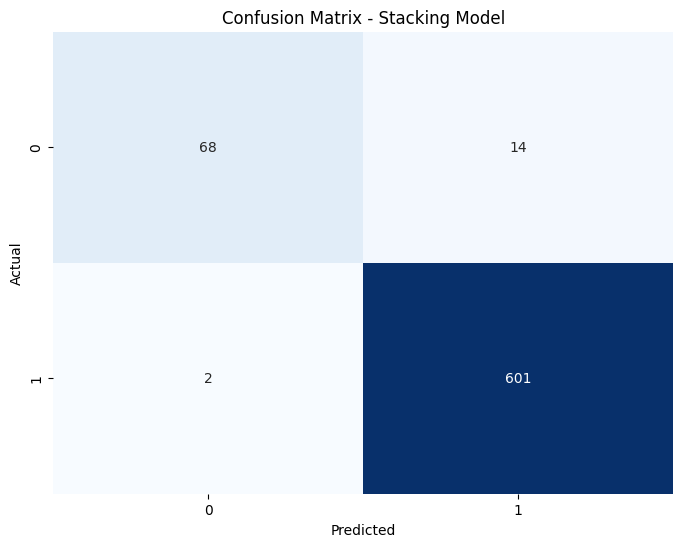

Final Accuracy: 0.9766423357664233


In [14]:
X_test = imputer.transform(X_test)
rf_pred_test = best_rf_model.predict(X_test)
svm_pred_test = svm_model.predict(X_test)
dt_pred_test = dt_model.predict(X_test) # Use dt_pred_test instead of dt_pred_train
nb_pred_test = nb_model.predict(X_test)
knn_pred_test = knn_model.predict(X_test)

stacked_test_features = np.column_stack((rf_pred_test, svm_pred_test,dt_pred_test,nb_pred_test,knn_pred_test))

stacked_test_features_encoded = enc.transform(stacked_test_features).toarray()
final_predictions = meta_model.predict(stacked_test_features_encoded)

# 2. Confusion Matrix for Stacking Model
cm = confusion_matrix(y_test, final_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Stacking Model')
plt.show()
print("Final Accuracy:", accuracy_score(y_test, final_predictions))

In [17]:
# Assuming 'final_predictions' and 'y_test' are defined from your previous code

# Calculate metrics
accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions, pos_label='pass')  # Assuming 'pass' is the positive label
recall = recall_score(y_test, final_predictions, pos_label='pass')
f1 = f1_score(y_test, final_predictions, pos_label='pass')

# For ROC-AUC, you need probability scores instead of predicted labels
final_probabilities = meta_model.predict_proba(stacked_test_features_encoded)[:, 1]  # Probability of 'pass'
roc_auc = roc_auc_score(y_test, final_probabilities)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

Accuracy: 0.9766423357664233
Precision: 0.9772357723577236
Recall: 0.9966832504145937
F1 Score: 0.986863711001642
ROC-AUC Score: 0.972768272458844
